In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#load csv file and label column
import pandas as pd 
data = pd.read_csv('analysis.csv',encoding='windows-1252')
data = data[['sentiment', 'text']]
data.columns = ['label', 'text']
data['label'] = data['label'].str.strip().str.lower()
print(data.head()) 
print(data['label'].value_counts())
len(data)

      label                                               text
0   neutral                I`d have responded, if I were going
1  negative      Sooo SAD I will miss you here in San Diego!!!
2  negative                          my boss is bullying me...
3  negative                     what interview! leave me alone
4  negative   Sons of ****, why couldn`t they put them on t...
label
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


27481

In [4]:
#clean text
import re 
import string 

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x) 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower()) 

data['text'] = data['text'].astype(str).map(alphanumeric).map(punc_lower)
print(data.head())

      label                                               text
0   neutral                i d have responded  if i were going
1  negative      sooo sad i will miss you here in san diego   
2  negative                          my boss is bullying me   
3  negative                     what interview  leave me alone
4  negative   sons of       why couldn t they put them on t...


In [5]:
#split data into features and labels
x = data.text
y = data.label

In [6]:
x.head()

0                  i d have responded  if i were going
1        sooo sad i will miss you here in san diego   
2                            my boss is bullying me   
3                       what interview  leave me alone
4     sons of       why couldn t they put them on t...
Name: text, dtype: object

In [7]:
y.head()

0     neutral
1    negative
2    negative
3    negative
4    negative
Name: label, dtype: object

In [8]:
#split into test and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

In [9]:
x_train.head()

23738    had a nice visit last night from a boy with vo...
26930                  never mind it s closed  sorry miley
9119      i won t leave you alone until you accept my a...
25447         not gonna ask what a boom boom is   morning 
25158    btw that song is you ll always find ur way bac...
Name: text, dtype: object

In [10]:
x_train.shape

(19236,)

In [11]:
y_train.head()

23738    positive
26930    negative
9119     positive
25447     neutral
25158     neutral
Name: label, dtype: object

In [12]:
y_train.shape

(19236,)

In [13]:
x_test.shape

(8245,)

In [14]:
y_test.shape

(8245,)

In [15]:
#Numerically encode the input data[Code]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

#(trained text_messages, terms)
print(x_train_cv.shape)

(19236, 19182)


In [16]:
import joblib
joblib.dump(cv, 'countvectorizer.joblib')

['countvectorizer.joblib']

In [17]:
type(x_train_cv)
import scipy.sparse
pd.DataFrame.sparse.from_spmatrix(x_test_cv)

,0,1,2,3,4,5,6,7,8,9,...,19172,19173,19174,19175,19176,19177,19178,19179,19180,19181
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
help(cv.fit_transform)

Help on method fit_transform in module sklearn.feature_extraction.text:

fit_transform(raw_documents, y=None) method of sklearn.feature_extraction.text.CountVectorizer instance
    Learn the vocabulary dictionary and return document-term matrix.

    This is equivalent to fit followed by transform, but more efficiently
    implemented.

    Parameters
    ----------
    raw_documents : iterable
        An iterable which generates either str, unicode or file objects.

    y : None
        This parameter is ignored.

    Returns
    -------
    X : array of shape (n_samples, n_features)
        Document-term matrix.



In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr = LogisticRegression(C=1.0, solver="liblinear", max_iter=500, penalty="l2", random_state=42)

print("Training Logistic Regression...")

# Train the logistic regression model
lr.fit(x_train_cv, y_train)

# Make predictions 
y_pred_lr = lr.predict(x_test_cv)

print("✓ Logistic Regression training complete!")
print(f"\nPredictions shape: {y_pred_lr.shape}")
print(f"First 10 predictions: {y_pred_lr[:10]}")

Training Logistic Regression...
✓ Logistic Regression training complete!

Predictions shape: (8245,)
First 10 predictions: ['negative' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'neutral' 'negative' 'neutral']


In [20]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb = MultinomialNB(alpha=2.0, fit_prior=True)

print("Training Naive Bayes...")

# Train the Naive Bayes model
nb.fit(x_train_cv, y_train)

# Make predictions
y_pred_nb = nb.predict(x_test_cv)

print("✓ Naive Bayes training complete!")
print(f"\nPredictions shape: {y_pred_nb.shape}")
print(f"First 10 predictions: {y_pred_nb[:10]}")

Training Naive Bayes...
✓ Naive Bayes training complete!

Predictions shape: (8245,)
First 10 predictions: ['negative' 'positive' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'negative']


In [21]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(kernel='linear', C=0.21544346900318834, degree=2, gamma='scale', probability=True, random_state=42)

print("Training SVM...")

# Train the SVM model
svm.fit(x_train_cv, y_train)

# Make predictions 
y_pred_svm = svm.predict(x_test_cv)

print("✓ SVM training complete!")
print(f"\nPredictions shape: {y_pred_svm.shape}")
print(f"First 10 predictions: {y_pred_svm[:10]}")

Training SVM...
✓ SVM training complete!

Predictions shape: (8245,)
First 10 predictions: ['neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'positive' 'negative' 'neutral']


In [22]:
from sklearn.ensemble import StackingClassifier

# Initialize the Stacking model
stacking = StackingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('svm', svm)],  # Base-model
    final_estimator=LogisticRegression(),  # Meta-model
    cv=5
)

print("Training Stacking...")

# Train the Stacking model
stacking.fit(x_train_cv, y_train)

# Make predictions 
y_pred_stacking = stacking.predict(x_test_cv)

print("✓ Stacking training complete!")
print(f"\nPredictions shape: {y_pred_stacking.shape}")
print(f"First 10 predictions: {y_pred_stacking[:10]}")

Training Stacking...
✓ Stacking training complete!

Predictions shape: (8245,)
First 10 predictions: ['neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'positive' 'negative' 'neutral']


LOGISTIC REGRESSION RESULTS
Accuracy:  0.6905 (69.05%)
Precision: 0.6938
Recall:    0.6905
F1-Score:  0.6902


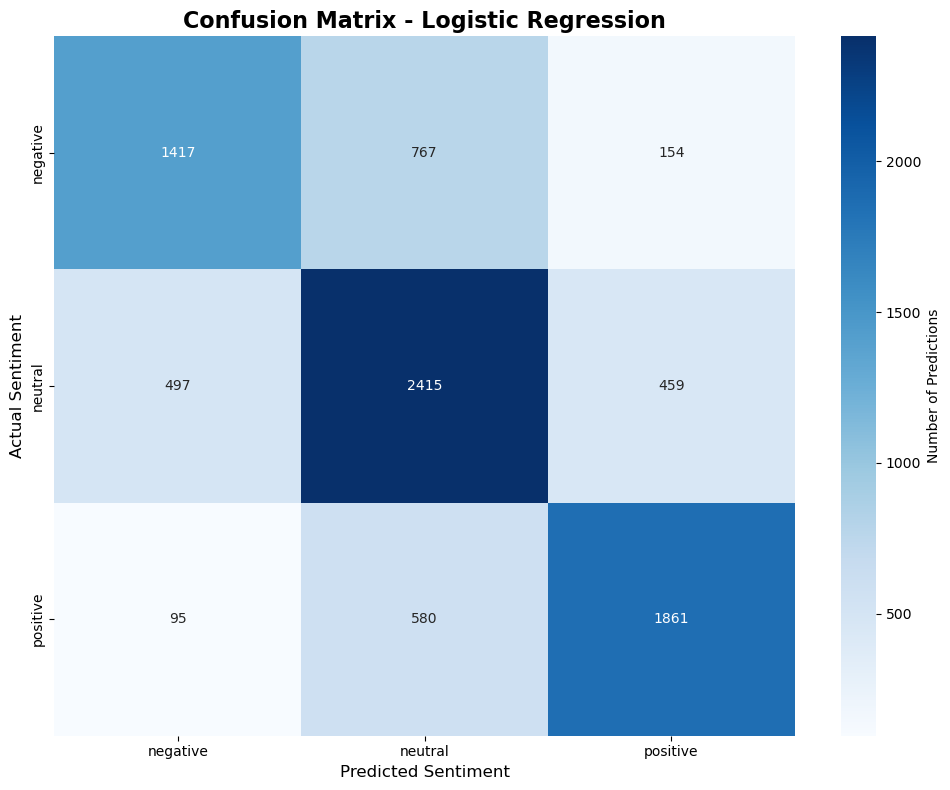


Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.61      0.65      2338
     neutral       0.64      0.72      0.68      3371
    positive       0.75      0.73      0.74      2536

    accuracy                           0.69      8245
   macro avg       0.70      0.69      0.69      8245
weighted avg       0.69      0.69      0.69      8245



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print("="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png', dpi=300)
plt.show()

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr))

NAIVE BAYES RESULTS
Accuracy:  0.6518 (65.18%)
Precision: 0.6614
Recall:    0.6518
F1-Score:  0.6507


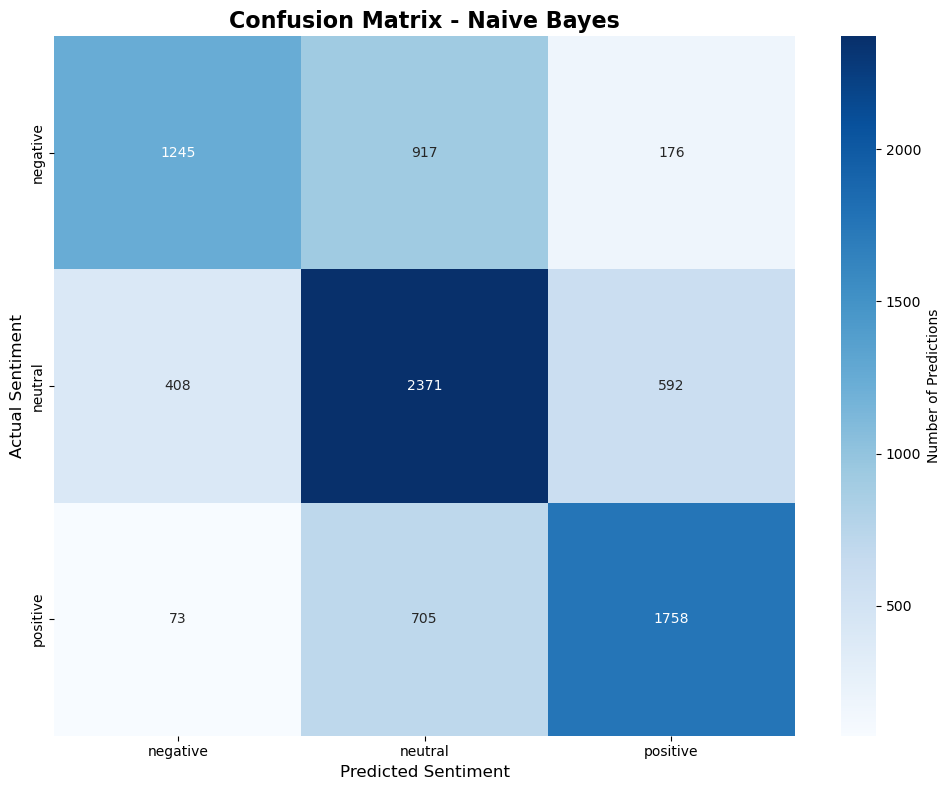


Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.53      0.61      2338
     neutral       0.59      0.70      0.64      3371
    positive       0.70      0.69      0.69      2536

    accuracy                           0.65      8245
   macro avg       0.67      0.64      0.65      8245
weighted avg       0.66      0.65      0.65      8245



In [24]:
# Calculate metrics (Naive Bayes)
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)

print("="*60)
print("NAIVE BAYES RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - Naive Bayes', fontsize=16, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.savefig('nb_confusion_matrix.png', dpi=300)
plt.show()

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_nb))

SVM RESULTS
Accuracy:  0.7100 (71.00%)
Precision: 0.7187
Recall:    0.7100
F1-Score:  0.7090


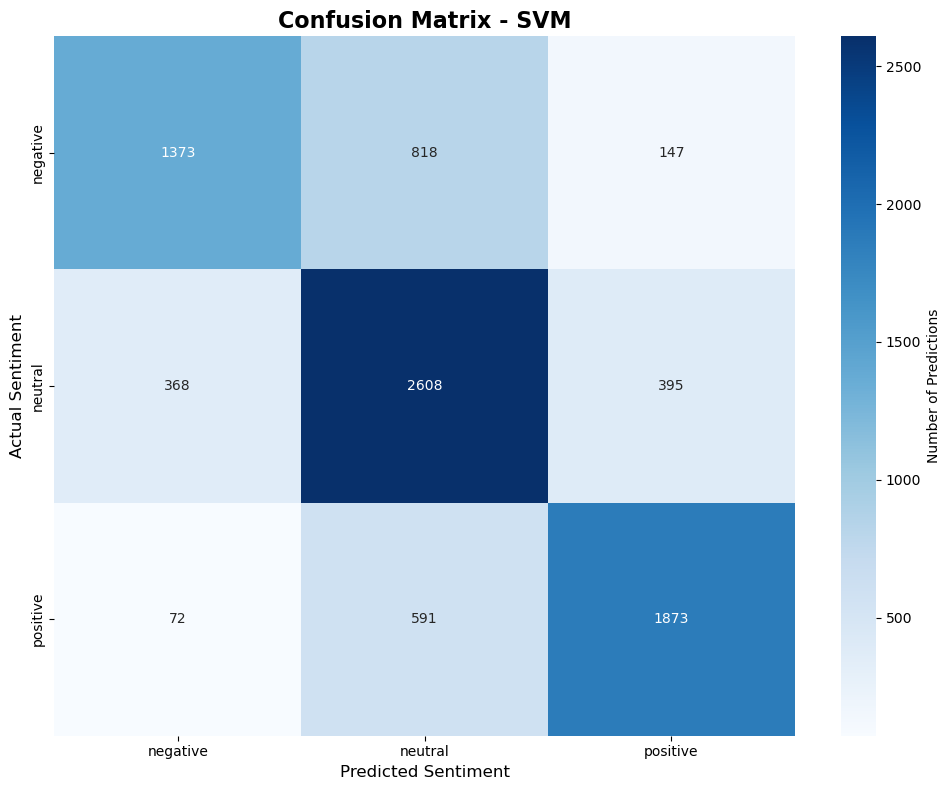


Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.59      0.66      2338
     neutral       0.65      0.77      0.71      3371
    positive       0.78      0.74      0.76      2536

    accuracy                           0.71      8245
   macro avg       0.73      0.70      0.71      8245
weighted avg       0.72      0.71      0.71      8245



In [25]:
# Calculate metrics (SVM)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print("="*60)
print("SVM RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - SVM', fontsize=16, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300)
plt.show()

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_svm))

STACKING RESULTS
Accuracy:  0.7179 (71.79%)
Precision: 0.7279
Recall:    0.7179
F1-Score:  0.7171


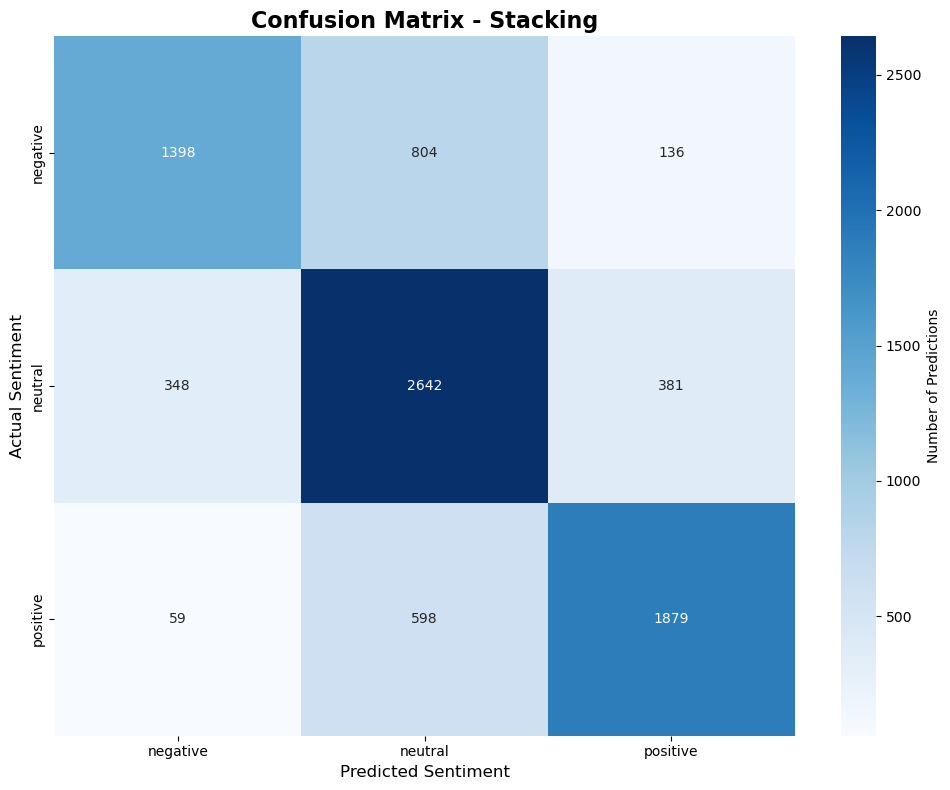


Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.60      0.67      2338
     neutral       0.65      0.78      0.71      3371
    positive       0.78      0.74      0.76      2536

    accuracy                           0.72      8245
   macro avg       0.74      0.71      0.72      8245
weighted avg       0.73      0.72      0.72      8245



In [26]:
# Calculate metrics (Stacking)
accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_stacking, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_stacking, average='weighted', zero_division=0)

print("="*60)
print("STACKING RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - Stacking', fontsize=16, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.savefig('stacking_confusion_matrix.png', dpi=300)
plt.show()

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_stacking))

In [27]:
# Import VADER for baseline comparison
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon', quiet=True)

True

In [28]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """
    Get VADER sentiment prediction
    Returns: sentiment label and scores dictionary
    """
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    
    # Classification rules for different sentiment
    if compound >= 0.05:
        return 'positive', scores
    elif compound <= -0.05:
        return 'negative', scores
    else:
        return 'neutral', scores

In [29]:
import pandas as pd
import re
import string

def predict_sentiment(text, model="lr"):
    """
    Predict sentiment for new text with proper preprocessing
    """
    # Remove numbers
    text_clean = re.sub(r"""\w*\d\w*""", ' ', text)
    
    # Remove punctuation and lowercase
    text_clean = re.sub('[%s]' % re.escape(string.punctuation), ' ', text_clean.lower())
    
    # Vectorize
    text_vectorized = cv.transform([text_clean])
    
    if model == 'lr':
        # Predict sentiment with logistic regression.
        prediction = lr.predict(text_vectorized)[0]
        probabilities = lr.predict_proba(text_vectorized)[0]
    elif model == 'nb':
        # Predict sentiment with naive bayes.
        prediction = nb.predict(text_vectorized)[0]
        probabilities = nb.predict_proba(text_vectorized)[0]
    elif model == 'svm':
        # Predict sentiment with SVM.
        prediction = svm.predict(text_vectorized)[0]
        probabilities = svm.predict_proba(text_vectorized)[0]
    elif model == 'stacking':
        # Predict sentiment with Stacking.
        prediction = stacking.predict(text_vectorized)[0]
        probabilities = stacking.predict_proba(text_vectorized)[0]
    else:
        raise ValueError("Model must be 'lr' or 'nb' or 'svm' or 'stacking'")

    return prediction, probabilities

# Test samples
test_sentences = [
    "This is wonderful, I'm so grateful for everything",
    "I love this movie! It was amazing!",
    "This product is terrible, worst purchase ever",
    "The meeting is scheduled for 3pm tomorrow",
    "Absolutely fantastic experience, highly recommend!"
]

print("="*70)
print("SENTIMENT ANALYSIS PREDICTIONS")
print("="*70)

for sentence in test_sentences:
    print(f"\nText: {sentence}")

    # VADER result(as refference)
    vader_sentiment, vader_scores = get_vader_sentiment(sentence)
    print(f"\nModel: VADER (Reference)")
    print(f"Predicted Sentiment: {vader_sentiment}")
    print(f"Compound Score: {vader_scores['compound']:.4f}")

    # Add explanation based on compound score
    compound = vader_scores['compound']
    if compound >= 0.05:
        print(f"  → Classified as positive (compound ≥ 0.05)")
    elif compound <= -0.05:
        print(f"  → Classified as negative (compound ≤ -0.05)")
    else:
        print(f"  → Classified as neutral (-0.05 < compound < 0.05)")

    for mdl in ["lr", "nb", "svm", "stacking"]:
        prediction, probs = predict_sentiment(sentence, model=mdl)

        print(f"\nModel: {mdl.upper()}")
        print(f"Predicted Sentiment: {prediction}")
        print("Confidence Scores:")

        for label, score in zip(lr.classes_, probs):
            print(f"  - {label.capitalize()}: {score:.2%}")

    print("-" * 70)

SENTIMENT ANALYSIS PREDICTIONS

Text: This is wonderful, I'm so grateful for everything

Model: VADER (Reference)
Predicted Sentiment: positive
Compound Score: 0.7902
  → Classified as positive (compound ≥ 0.05)

Model: LR
Predicted Sentiment: positive
Confidence Scores:
  - Negative: 1.80%
  - Neutral: 21.31%
  - Positive: 76.89%

Model: NB
Predicted Sentiment: positive
Confidence Scores:
  - Negative: 0.94%
  - Neutral: 9.08%
  - Positive: 89.99%

Model: SVM
Predicted Sentiment: positive
Confidence Scores:
  - Negative: 3.37%
  - Neutral: 17.55%
  - Positive: 79.08%

Model: STACKING
Predicted Sentiment: positive
Confidence Scores:
  - Negative: 1.75%
  - Neutral: 9.77%
  - Positive: 88.48%
----------------------------------------------------------------------

Text: I love this movie! It was amazing!

Model: VADER (Reference)
Predicted Sentiment: positive
Compound Score: 0.8619
  → Classified as positive (compound ≥ 0.05)

Model: LR
Predicted Sentiment: positive
Confidence Scores:
  

In [30]:
import joblib

joblib.dump(lr, "logistic_model.joblib")
joblib.dump(nb, "nb_model.joblib")
joblib.dump(svm, "svm_model.joblib")
joblib.dump(stacking, "stacking_model.joblib")

['stacking_model.joblib']